# Multiple Linear Regression
## CarPrice Assignment
### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car 

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

#### Business Goal
As a data analyst I am required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1: Reading, Understanding and Cleaning of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
car_df = pd.read_csv(r"E:\Rajeev\IIITB\ML&AI\Machine_Learning_1\Assignment\CarPrice_Assignment.csv", encoding = 'ISO-8859-1')
car_df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [3]:
car_df.shape

(205, 26)

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# storing unique value in a variable 
arr = car_df.car_ID.unique()
# Number of unique values in this array
len(arr)

205

Number of unique car id's are same as number of rows, so there is no any duplicate rows.

In [6]:
# summing up the missing values (column-wise) and finding its percentage
round(car_df.isnull().sum()/len(car_df.index)*100,2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

No missing values present in any column

In [7]:
# storing unique value in a variable 
arr = car_df.symboling.unique()
# Number of unique values in this array
len(arr)

6

In [8]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# extracting car company name from the strings provided in column CarName
car_df['CarCompany1'] = car_df['CarName'].str.split("-").apply(lambda x: x[0])
car_df['CarCompany'] = car_df['CarCompany1'].str.split(" ").apply(lambda x: x[0])
car_df[['CarName', 'CarCompany']].tail(3)

,CarName,CarCompany
202,volvo 244dl,volvo
203,volvo 246,volvo
204,volvo 264gl,volvo


In [10]:
car_df.shape

(205, 28)

In [11]:
# dropping two columns CarName and CarCompany1 as these two are redundent
car_df.drop(['CarName', 'CarCompany1'], axis = 1, inplace = True )
car_df.head(3)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa


In [12]:
car_df.shape

(205, 26)

### Step 2: Visualising the Data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

<Figure size 2400x1200 with 0 Axes>

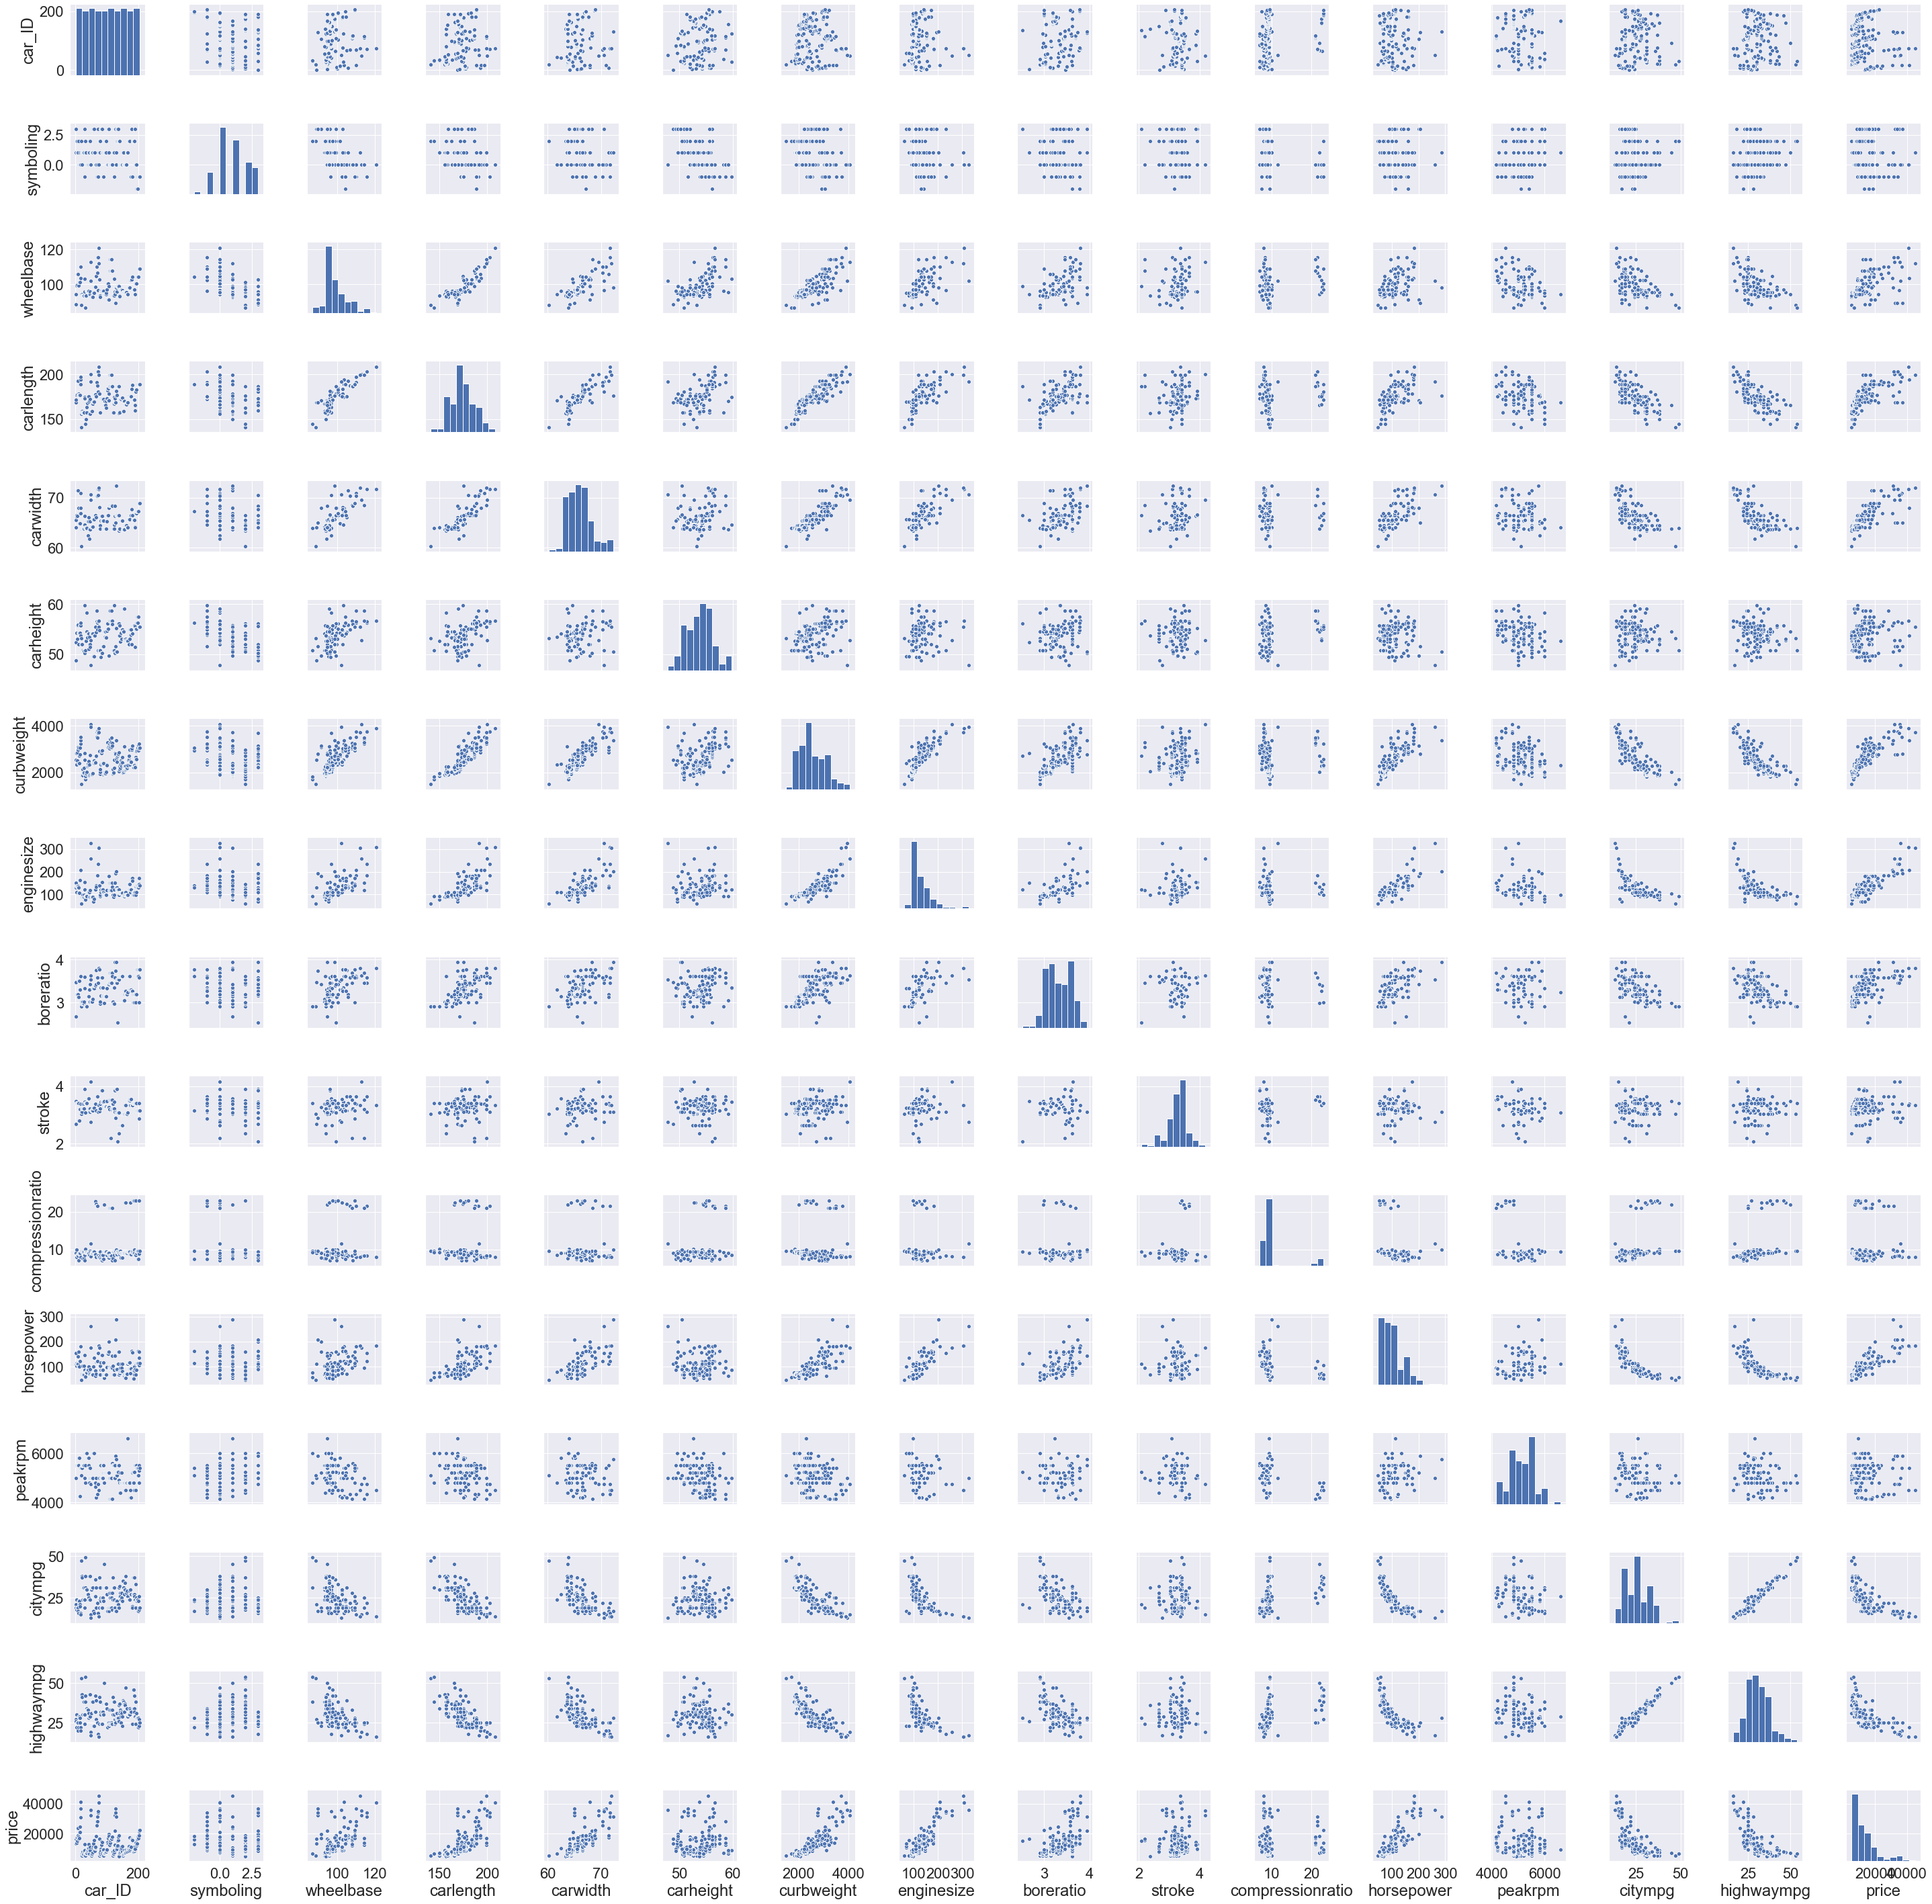

In [16]:
# Making pair plot for all numeric variables in main dataframe
sns.set(font_scale= 2.0)
plt.figure(figsize = (30,15), dpi = 80)
sns.pairplot(car_df)
sns.set_style("whitegrid")
plt.show()

Above scatter plots clearly showing there are strong linear relationships between price and many independent variables. Also, many independent variables are related with each other (indicating multicollnearity). So, multiple linear regression model is required. From this pair plot, it can be seen that price has a good relation with following independent variables:

wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, horsepower, peakrpm, citympg and highwaympg.

#### Visualising categorical Variables

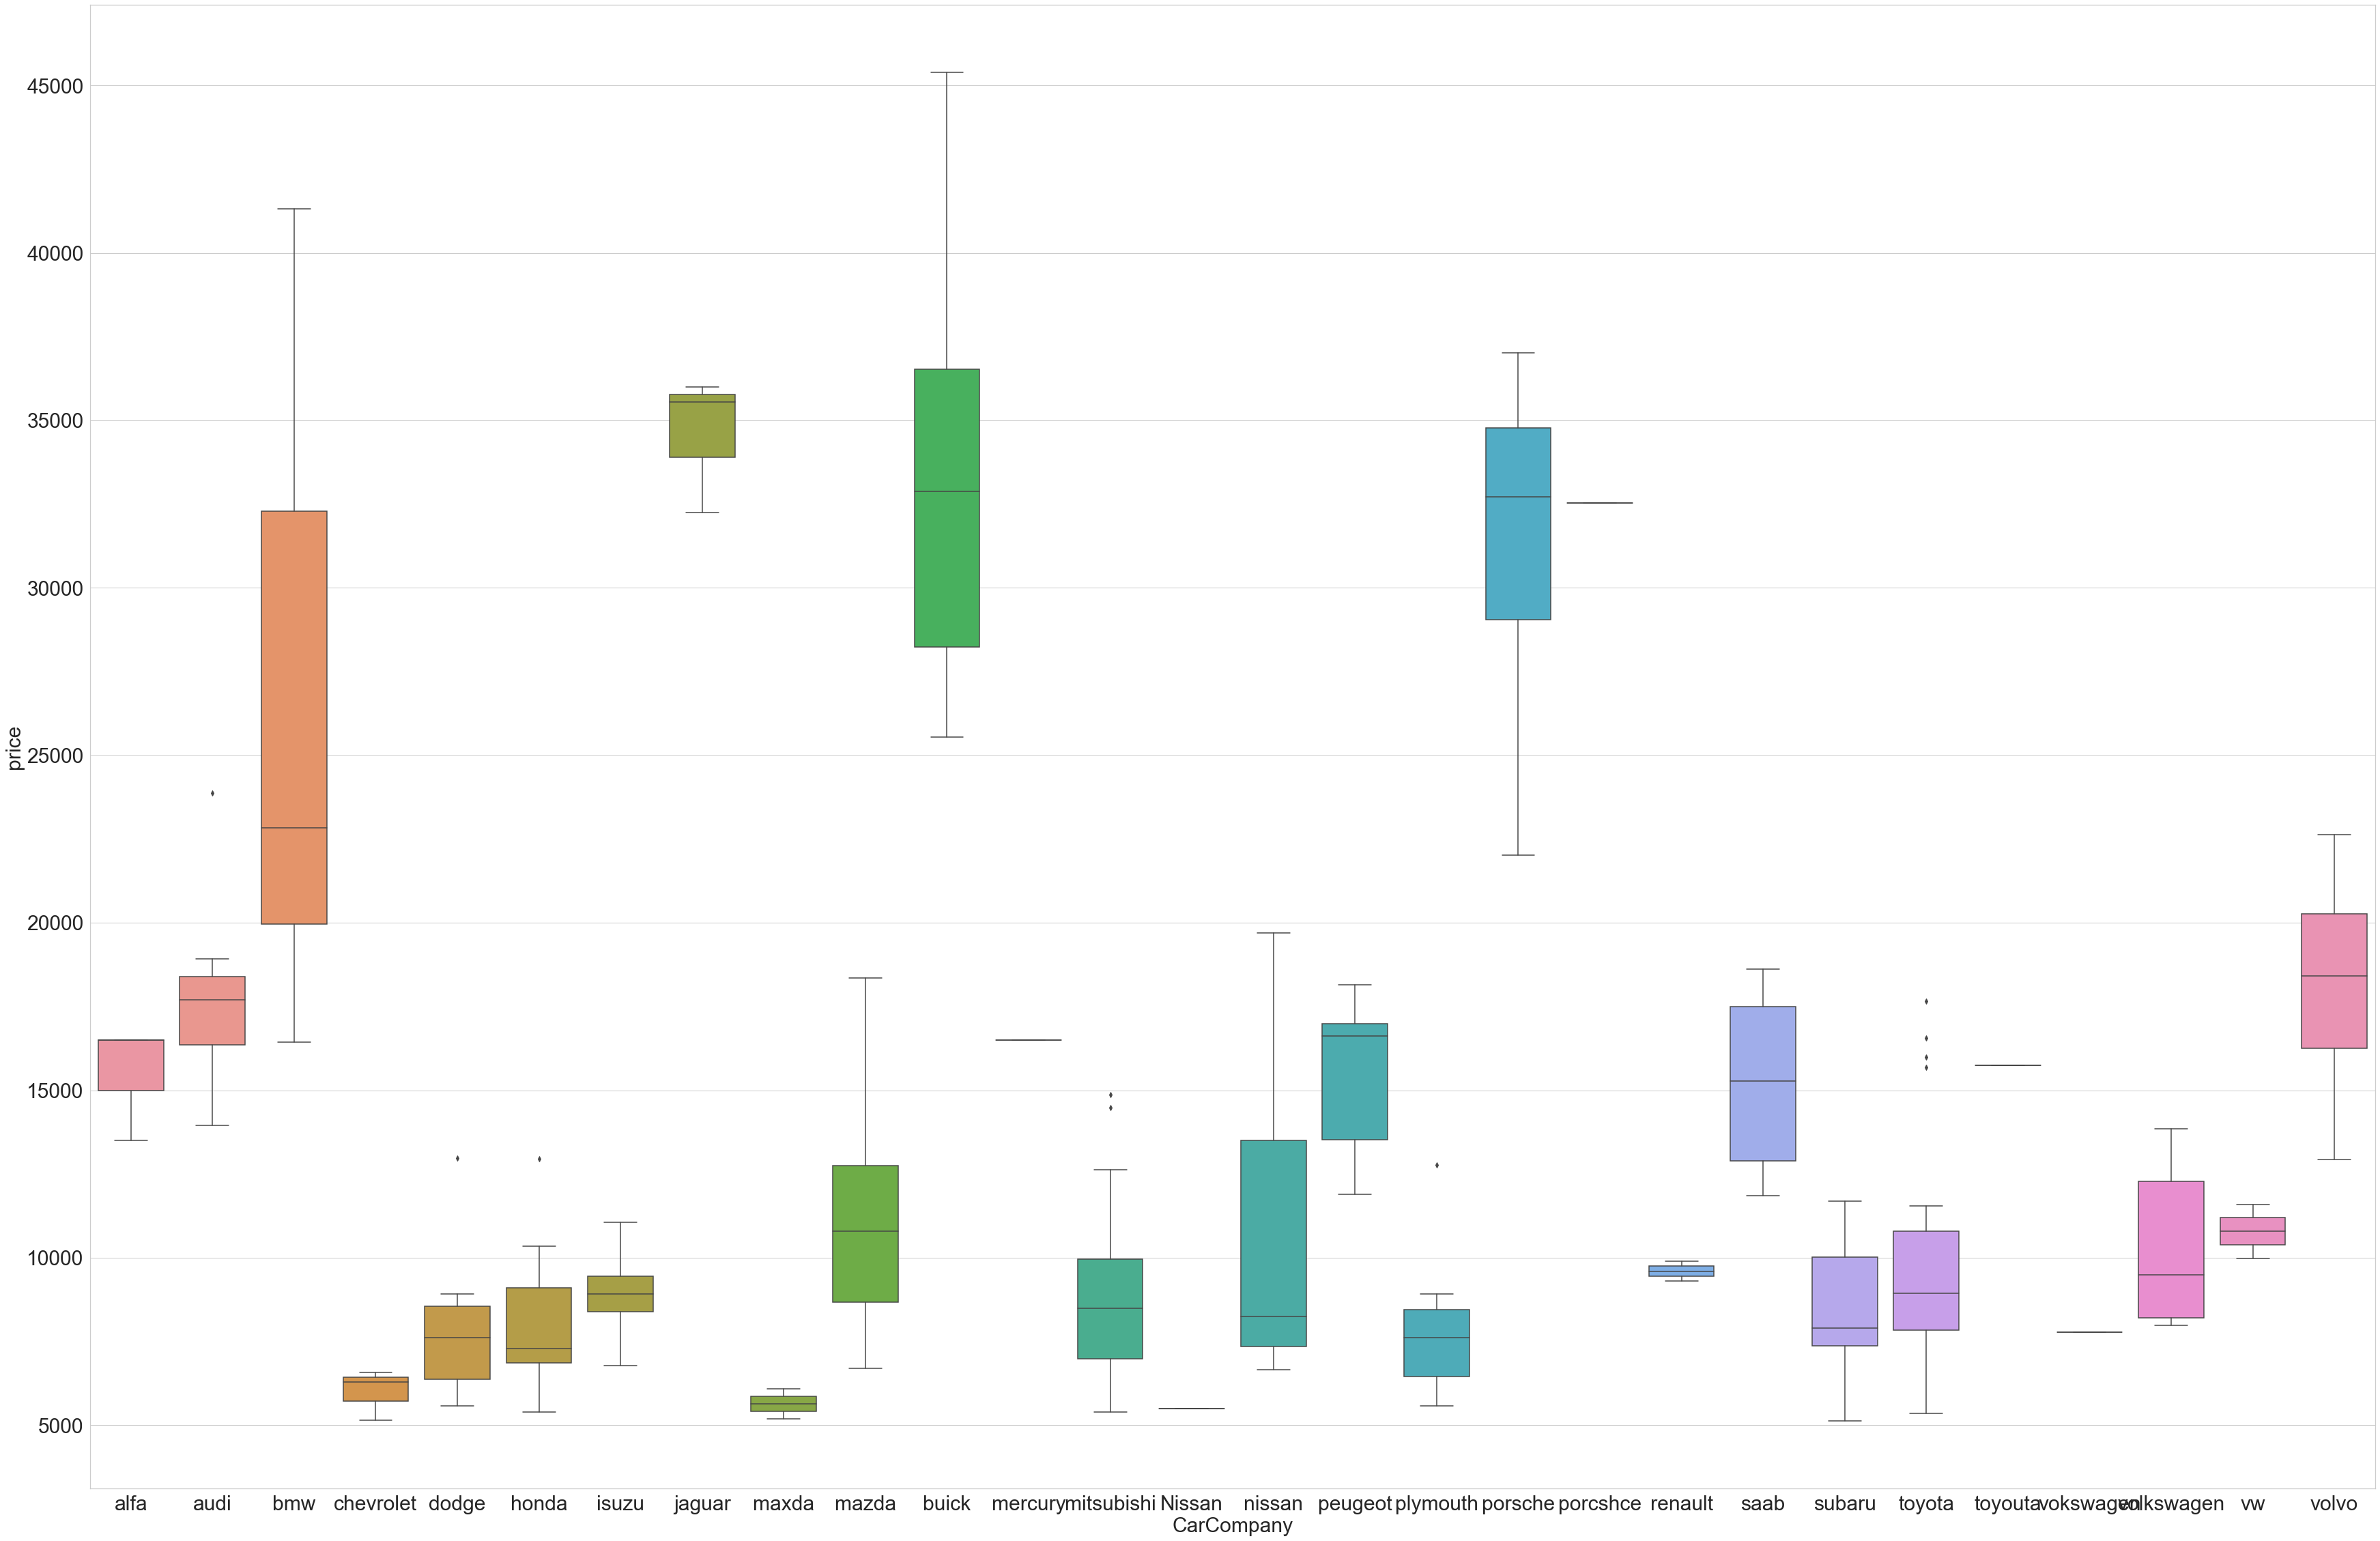

In [17]:
# plotting price vs. carcompany
plt.figure(figsize=(60, 40))
# sns.set(font_scale = 3)
plt.tick_params(labelsize=30)
sns.boxplot(x = 'CarCompany', y = 'price', data = car_df)
plt.xlabel("CarCompany", fontsize = 30)
plt.ylabel("price", fontsize = 30)
sns.set_style("whitegrid")
plt.show()

Here there are spelling mistakes with few car companies like 'maxda', 'porcshce', 'toyouta', 'vokswagen'. These should be corrected. 'Nissan' and 'nissan' are same company, so should be corrected. Also, VW is the logo of the 'volkswagen', so ideally both are same company. 

In [14]:
car_df['CarCompany'] = car_df['CarCompany'].replace('maxda', 'mazda') 
car_df['CarCompany'] = car_df['CarCompany'].replace('Nissan', 'nissan') 
car_df['CarCompany'] = car_df['CarCompany'].replace('porcshce', 'porsche') 
car_df['CarCompany'] = car_df['CarCompany'].replace('toyouta', 'toyota') 
car_df['CarCompany'] = car_df['CarCompany'].replace('vokswagen', 'volkswagen')
car_df['CarCompany'] = car_df['CarCompany'].replace('vw', 'volkswagen')
car_df[['CarCompany']].head()

,CarCompany
0,alfa
1,alfa
2,alfa
3,audi
4,audi


In [15]:
car_df[['CarCompany']].tail()

,CarCompany
200,volvo
201,volvo
202,volvo
203,volvo
204,volvo


In [16]:
car_df.shape # to recheck number of columns again 

(205, 26)

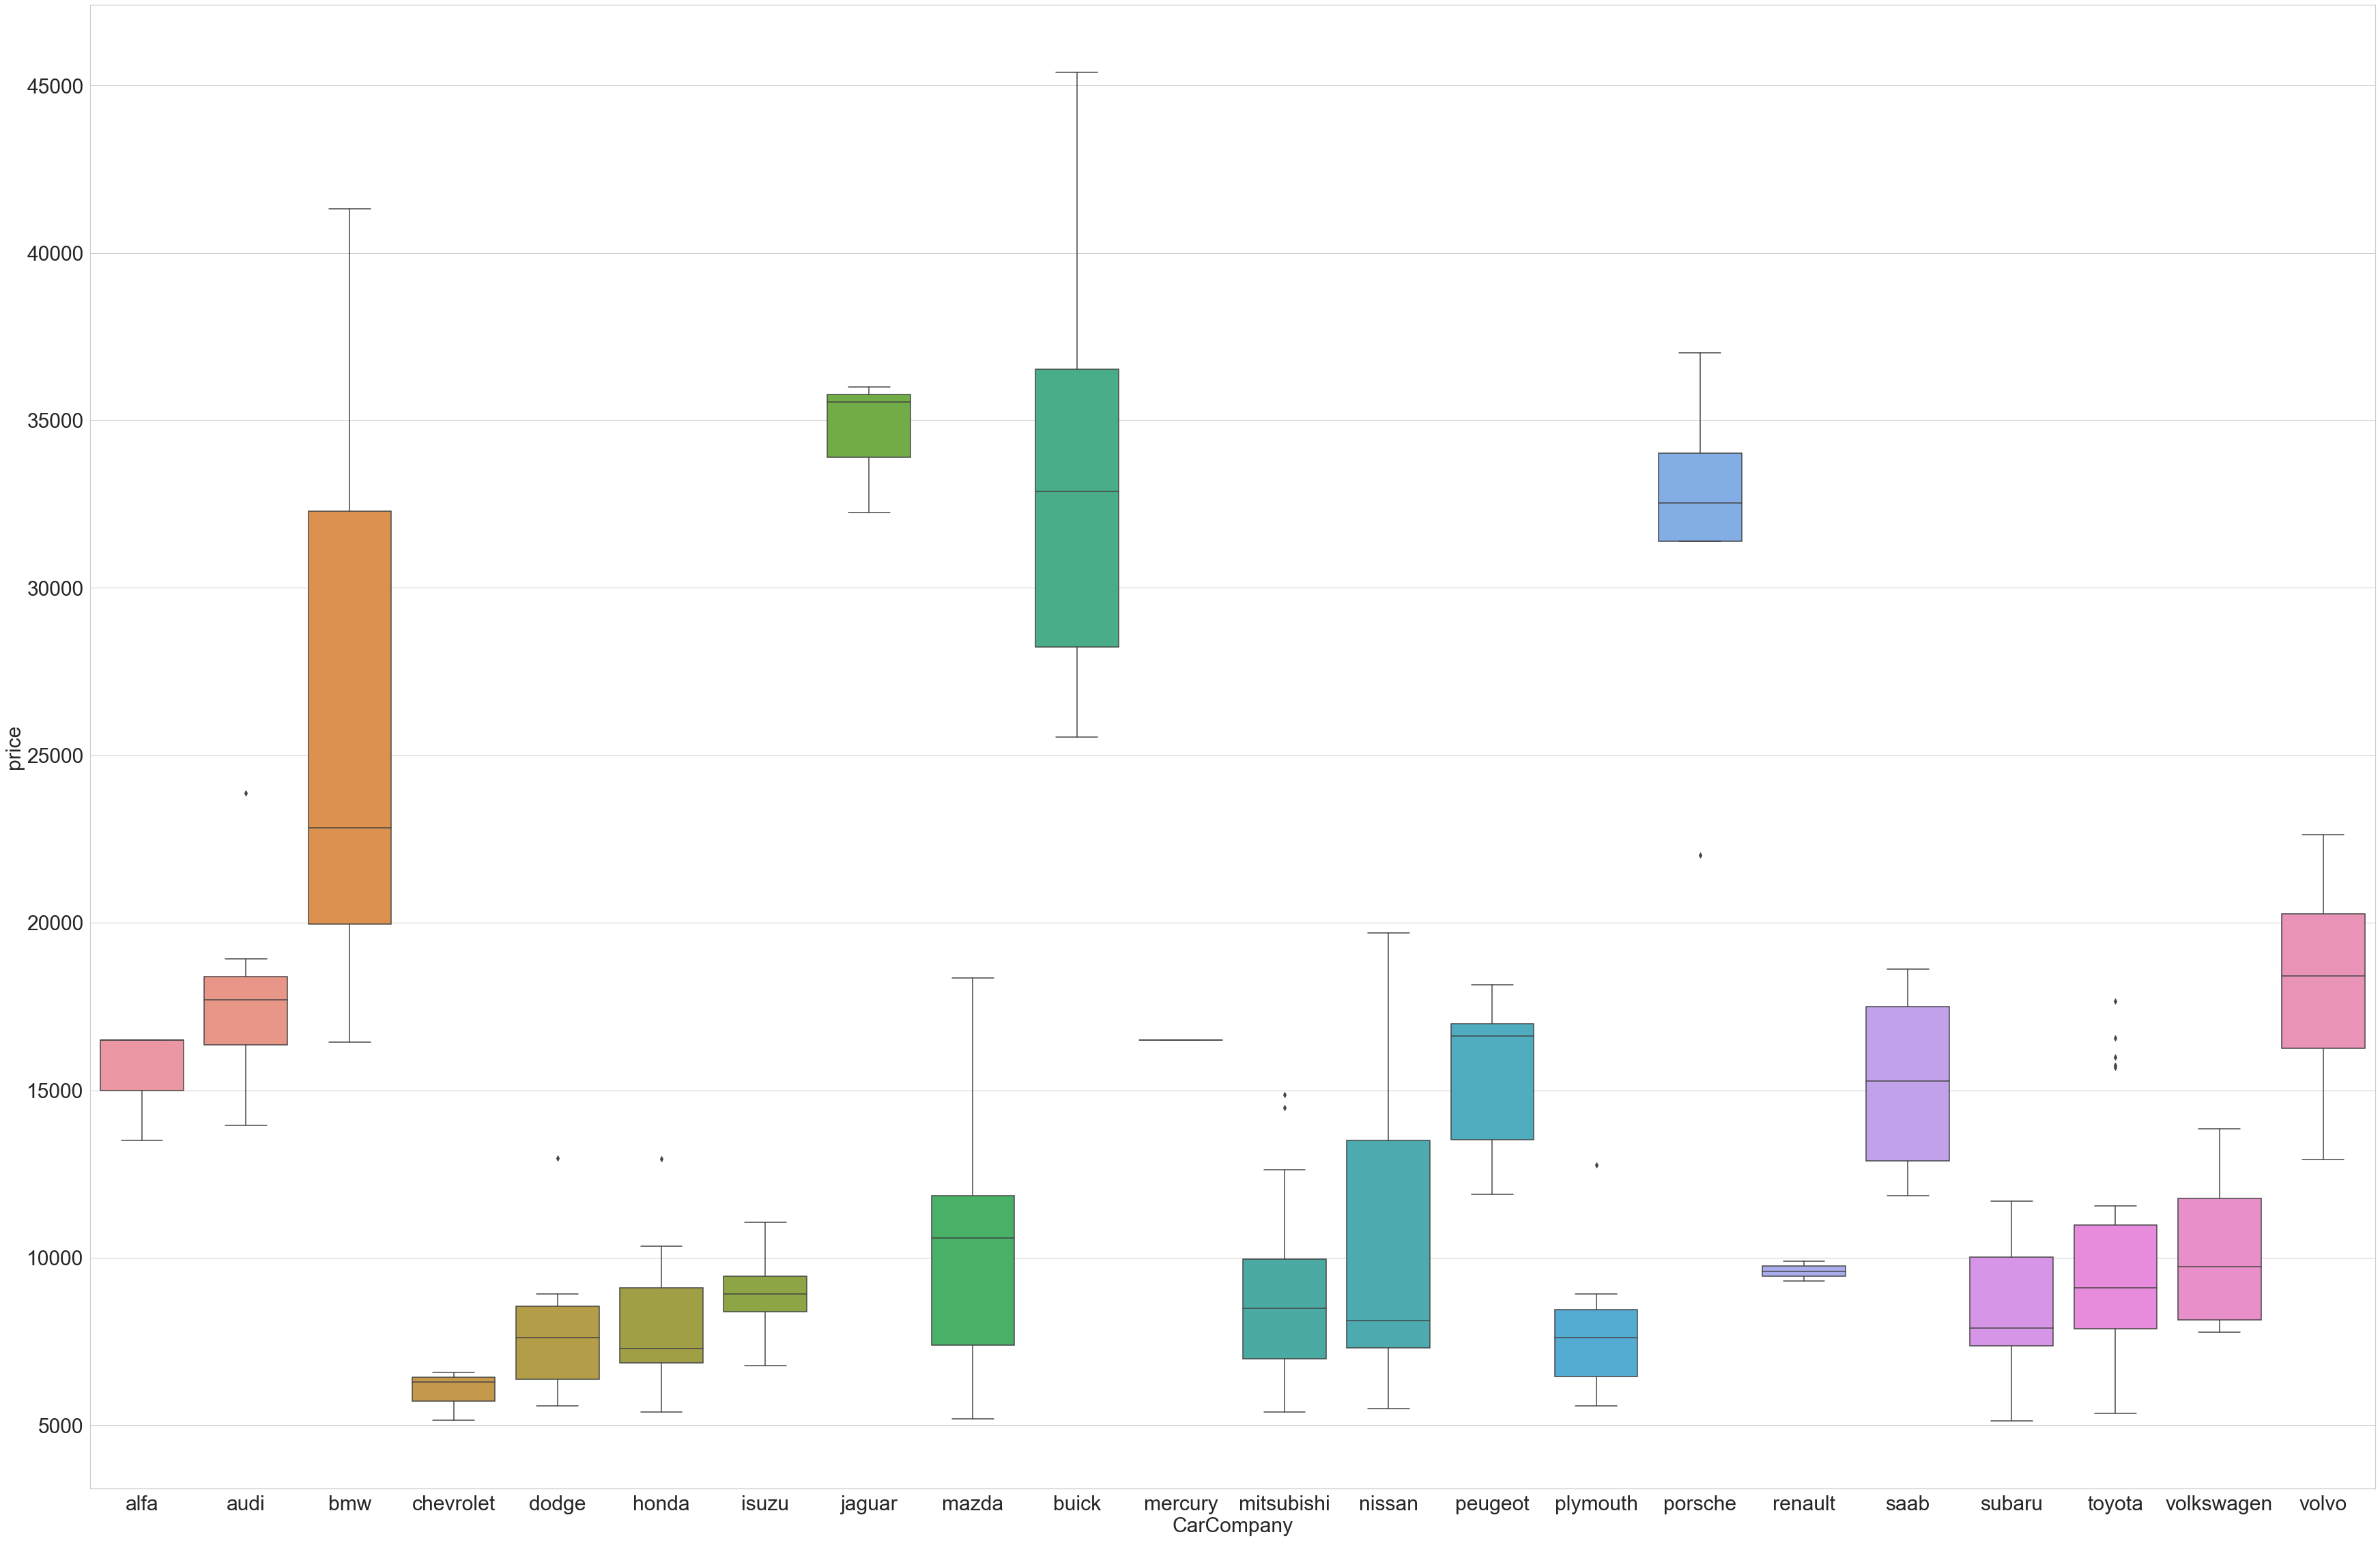

In [21]:
# plotting price vs. carcompany again to cross check the corrections done above 
plt.figure(figsize=(60, 40))
# sns.set(font_scale = 3)
plt.tick_params(labelsize=30)
sns.boxplot(x = 'CarCompany', y = 'price', data = car_df)
plt.xlabel("CarCompany", fontsize = 30)
plt.ylabel("price", fontsize = 30)
sns.set_style("whitegrid")
plt.show()

Looking the median value for each car brand, it can be seen above that price of a car varies with its brand name. Few brands have very high range of price, whereas for few it is very small.  

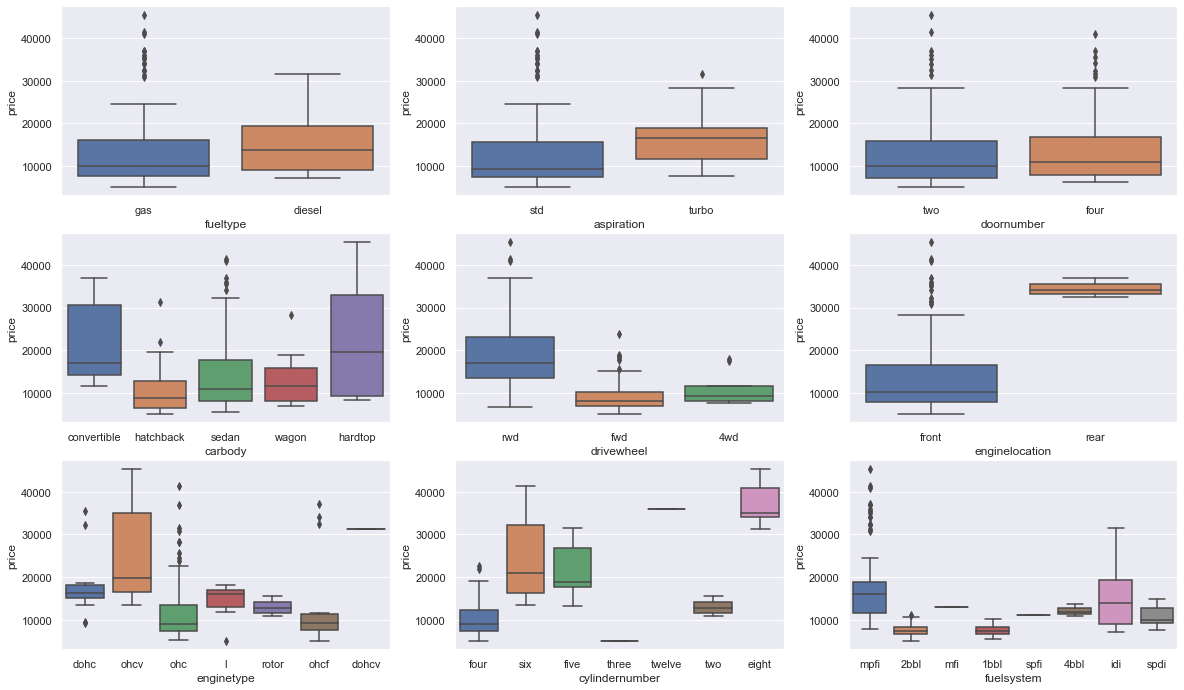

In [22]:
plt.figure(figsize=(20, 16))
plt.tick_params(labelsize=10)
sns.set(font_scale = 1.0)
plt.subplot(4,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
# plt.yscale('log')
plt.show()

From above box plot it can be seen that, few categorical variables have only two subcategories, whereas few have many upto seven subcategories. Assigning dummy variables to more than three subcatogaries for a categorical variable is a cumbersome task, so to make it simple, I will not consider more than three subcatogaries and eliminate the remainings. I will prefer to have three important such sub-categorical variables which cover the entire price range for that main categorical variable.  
For carbody types, price range is significantly covered by 'convertible', 'sedan' and 'hardtop', so remaining 'hatchback' and 'wagon' types can be dropped. There are seven engine types, among them 'ohcv', 'ohc' and 'ohcf' are significant which cover the entire price range, others can be dropped. There are seven cylinder numbers; among them 'four', 'six' and 'eight' are significant which cover the entire price range, others can be dropped. Similarly, for fuelsystem 'mpfi', '2bbl' and 'idi' are significant and others can be dropped. 

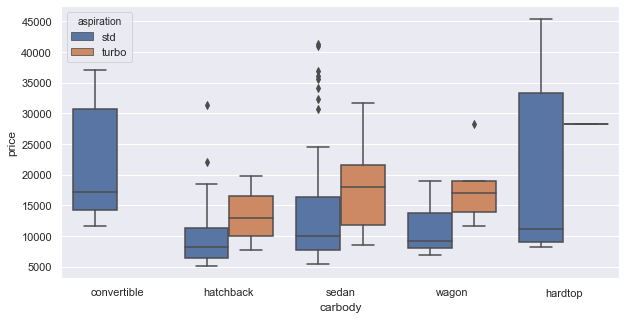

In [23]:
plt.figure(figsize = (10, 5))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'carbody', y = 'price', hue = 'aspiration', data = car_df)
plt.show()

From above box plot, carbody types hatcback, sedan and wagon have aspiration type as turbo more pricy. So I would select turbo as my dummy variable '1' in my analysis and drop std by considering it as '0' dummy variable. 

### Step 3: Preparing the data for modelling

In [17]:
car_df.tail(3)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo
204,205,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,volvo


In [18]:
car_df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [19]:
# Creating dummy variables for the feature 'fueltype' and storing it to a new variable - 'fuel_type'
# from above box plot it can be seen that median and spread of diesel is more than the gas, so will drop gas 
# dropping the number of dummy variables from 2 to 1, 1 represents diesel and 0 represents gas
fuel_type = pd.get_dummies(car_df['fueltype'], drop_first = False)
fuel_type.drop('gas', axis = 1, inplace = True)
fuel_type.tail(3)

,diesel
202,0
203,1
204,0


In [20]:
# Add the results to the original car_df dataframe

car_df = pd.concat([car_df, fuel_type], axis = 1)
car_df.tail(3)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,diesel
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,0
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,1
204,205,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,19,25,22625.0,volvo,0


In [21]:
# Drop 'fueltype' as we have created the dummies for it

car_df.drop(['fueltype'], axis = 1, inplace = True)
car_df.head(2)

,car_ID,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,diesel
0,1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa,0
1,2,3,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa,0


In [22]:
car_df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [23]:
# Creating dummy variables for the feature 'fueltype' and storing it to a new variable - 'asp_iration'
# from above box plot it can be seen that median and spread of turbo is more than the std, so will std 
# dropping the number of dummy variables from 2 to 1, 1 represents turbo and 0 represents std
asp_iration = pd.get_dummies(car_df['aspiration'], drop_first = True)
asp_iration.tail(3)

,turbo
202,0
203,1
204,1


In [24]:
car_df[['aspiration']].tail(3)

,aspiration
202,std
203,turbo
204,turbo


In [25]:
# Add the results to the original car_df dataframe

car_df = pd.concat([car_df, asp_iration], axis = 1)
car_df.head(2)

,car_ID,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,diesel,turbo
0,1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,alfa,0,0
1,2,3,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,alfa,0,0


In [26]:
# Drop 'aspiration' as we have created the dummies for it

car_df.drop(['aspiration'], axis = 1, inplace = True)
car_df.head(2)

,car_ID,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,diesel,turbo
0,1,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa,0,0
1,2,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa,0,0


In [27]:
car_df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [28]:
car_df.head(2)

,car_ID,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,diesel,turbo
0,1,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa,0,0
1,2,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa,0,0


In [29]:
# from above box plot it can be seen that median and spread of both types of doors are very similar, so will retain both 
# replacing doornumber strings with corresponding integer numbers
car_df['doornumber'] = car_df['doornumber'].replace({"two":"2.0"},regex=False)
car_df['doornumber'] = car_df['doornumber'].replace({"four":"4.0"},regex=False)

In [30]:
car_df['doornumber'] = pd.to_numeric(car_df['doornumber'], errors='coerce')

In [31]:
car_df[['doornumber']].head(2)

,doornumber
0,2.0
1,2.0


In [32]:
print(car_df.doornumber.dtypes)

float64


In [33]:
car_df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [34]:
# selecting only significant carbody types convertible, sedan and hardtop
car_df1 = car_df.loc[(car_df['carbody'] == 'convertible') | (car_df['carbody'] == 'sedan') | (car_df['carbody'] == 'hardtop'), :]
car_df1[['carbody']].tail(3)

,carbody
202,sedan
203,sedan
204,sedan


In [35]:
car_df1.shape

(110, 26)

In [36]:
car_df1.carbody.value_counts()

sedan          96
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [37]:
# Creating dummy variables for the feature 'carbody' and storing it to a new variable - 'car_body'
# dropping the number of dummy variables from 3 to 2; 00 represents sedan, 10 represents convertible and 01 represents hardtop
car_body = pd.get_dummies(car_df1['carbody'], drop_first = False)
car_body.drop(['sedan'], axis = 1, inplace = True)

In [38]:
car_body.head(2)

,convertible,hardtop
0,1,0
1,1,0


In [39]:
# Add the results to the original car_df dataframe

car_df1 = pd.concat([car_df1, car_body], axis = 1)

In [40]:
car_df1.head(3)

,car_ID,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,diesel,turbo,convertible,hardtop
0,1,3,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.0,alfa,0,0,1,0
1,2,3,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.0,alfa,0,0,1,0
3,4,2,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.0,audi,0,0,0,0


In [41]:
# Drop 'carbody' as we have created the dummies for it

car_df1.drop(['carbody'], axis = 1, inplace = True)
car_df1.head(2)

,car_ID,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,diesel,turbo,convertible,hardtop
0,1,3,2.0,rwd,front,88.6,168.8,64.1,48.8,2548,...,111,5000,21,27,13495.0,alfa,0,0,1,0
1,2,3,2.0,rwd,front,88.6,168.8,64.1,48.8,2548,...,111,5000,21,27,16500.0,alfa,0,0,1,0


In [42]:
car_df1.drivewheel.value_counts()

fwd    59
rwd    48
4wd     3
Name: drivewheel, dtype: int64

In [43]:
# Creating dummy variables for the feature 'drivewheel' and storing it to a new variable - 'drive_wheel'
# dropping the number of dummy variables from 3 to 2; 00 represents 4wd, 10 represents fwd and 01 represents rwd 

drive_wheel = pd.get_dummies(car_df1['drivewheel'], drop_first = True)
drive_wheel.head(5)

,fwd,rwd
0,0,1
1,0,1
3,1,0
4,0,0
5,1,0


In [44]:
car_df1[['drivewheel']].head(5)

,drivewheel
0,rwd
1,rwd
3,fwd
4,4wd
5,fwd


In [45]:
# Add the results to the car_df1 dataframe

car_df1 = pd.concat([car_df1, drive_wheel], axis = 1)

In [46]:
# Drop 'drivewheel' as we have created the dummies for it

car_df1.drop(['drivewheel'], axis = 1, inplace = True)

In [47]:
car_df1.head(2)

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,citympg,highwaympg,price,CarCompany,diesel,turbo,convertible,hardtop,fwd,rwd
0,1,3,2.0,front,88.6,168.8,64.1,48.8,2548,dohc,...,21,27,13495.0,alfa,0,0,1,0,0,1
1,2,3,2.0,front,88.6,168.8,64.1,48.8,2548,dohc,...,21,27,16500.0,alfa,0,0,1,0,0,1


In [48]:
car_df1.enginelocation.value_counts()

front    107
rear       3
Name: enginelocation, dtype: int64

In [49]:
# Creating dummy variables for the feature 'enginelocation' and storing it to a new variable - 'engine_location'
# dropping the number of dummy variables from 2 to 1; 0 represents rear, 1 represents front, retaining front as it having 
# wider spread of price 

engine_location = pd.get_dummies(car_df1['enginelocation'], drop_first = False)
engine_location.drop(['rear'], axis = 1, inplace = True)

In [163]:
engine_location.head(2)

,front
0,1
1,1


In [50]:
# Add the results to the car_df1 dataframe

car_df1 = pd.concat([car_df1, engine_location], axis = 1)

In [51]:
# Drop 'enginelocation' as we have created the dummies for it

car_df1.drop(['enginelocation'], axis = 1, inplace = True)

In [52]:
car_df1.head(2)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,highwaympg,price,CarCompany,diesel,turbo,convertible,hardtop,fwd,rwd,front
0,1,3,2.0,88.6,168.8,64.1,48.8,2548,dohc,four,...,27,13495.0,alfa,0,0,1,0,0,1,1
1,2,3,2.0,88.6,168.8,64.1,48.8,2548,dohc,four,...,27,16500.0,alfa,0,0,1,0,0,1,1


In [53]:
car_df1.enginetype.value_counts()

ohc     80
ohcf     8
ohcv     8
l        7
dohc     7
Name: enginetype, dtype: int64

In [54]:
# selecting only significant enginey types ohc, ohcv and ohcf
car_df2 = car_df1.loc[(car_df1['enginetype'] == 'ohc') | (car_df1['enginetype'] == 'ohcv') | (car_df1['enginetype'] == 'ohcf'), :]
car_df2[['enginetype']].tail(3)

,enginetype
202,ohcv
203,ohc
204,ohc


In [55]:
car_df2.enginetype.value_counts()

ohc     80
ohcf     8
ohcv     8
Name: enginetype, dtype: int64

In [56]:
# Creating dummy variables for the feature 'enginetype' and storing it to a new variable - 'engine_type'
# dropping the number of dummy variables from 3 to 2; 00 represents ohcf, 10 represents ohc and 01 represents ohcv 

engine_type = pd.get_dummies(car_df2['enginetype'], drop_first = False)
engine_type.drop(['ohcf'], axis = 1, inplace = True)

In [57]:
engine_type.tail(2)

,ohc,ohcv
203,1,0
204,1,0


In [58]:
car_df2[['enginetype']].tail(2)

,enginetype
203,ohc
204,ohc


In [59]:
# Add the results to the car_df2 dataframe

car_df2 = pd.concat([car_df2, engine_type], axis = 1)

In [60]:
# Drop 'enginetype' as we have created the dummies for it

car_df2.drop(['enginetype'], axis = 1, inplace = True)

In [61]:
car_df2.head(2)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,CarCompany,diesel,turbo,convertible,hardtop,fwd,rwd,front,ohc,ohcv
3,4,2,4.0,99.8,176.6,66.2,54.3,2337,four,109,...,audi,0,0,0,0,1,0,1,1,0
4,5,2,4.0,99.4,176.6,66.4,54.3,2824,five,136,...,audi,0,0,0,0,0,0,1,1,0


In [62]:
car_df2.cylindernumber.value_counts()

four      70
six       13
five       8
eight      4
twelve     1
Name: cylindernumber, dtype: int64

In [63]:
# selecting only significant cylindernumber four, six and eight
car_df3 = car_df2.loc[(car_df2['cylindernumber'] == 'four') | (car_df2['cylindernumber'] == 'six') | (car_df2['cylindernumber'] == 'eight'), :]
car_df3[['cylindernumber']].tail(3)

,cylindernumber
202,six
203,six
204,four


In [64]:
car_df3.cylindernumber.value_counts()

four     70
six      13
eight     4
Name: cylindernumber, dtype: int64

In [65]:
# Creating dummy variables for the feature 'cylindernumber' and storing it to a new variable - 'cylinder_number'
# dropping the number of dummy variables from 3 to 2; 00 represents four, 10 represents eight, 01 represents six 

cylinder_number = pd.get_dummies(car_df3['cylindernumber'], drop_first = False)
cylinder_number.drop(['four'], axis = 1, inplace = True)

In [66]:
cylinder_number.head(3)

,eight,six
3,0,0
10,0,0
11,0,0


In [67]:
car_df3[['cylindernumber']].head(3)

,cylindernumber
3,four
10,four
11,four


In [68]:
# Add the results to the car_df3 dataframe

car_df3 = pd.concat([car_df3, cylinder_number], axis = 1)

In [69]:
# Drop 'cylindernumber' as we have created the dummies for it

car_df3.drop(['cylindernumber'], axis = 1, inplace = True)

In [70]:
car_df3.head(2)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,...,turbo,convertible,hardtop,fwd,rwd,front,ohc,ohcv,eight,six
3,4,2,4.0,99.8,176.6,66.2,54.3,2337,109,mpfi,...,0,0,0,1,0,1,1,0,0,0
10,11,2,2.0,101.2,176.8,64.8,54.3,2395,108,mpfi,...,0,0,0,0,1,1,1,0,0,0


In [71]:
car_df3.fuelsystem.value_counts()

mpfi    43
2bbl    29
idi     10
1bbl     3
spdi     2
Name: fuelsystem, dtype: int64

In [72]:
# selecting only significant fuelsystem mpfi, 2bbl and idi
car_df4 = car_df3.loc[(car_df3['fuelsystem'] == 'mpfi') | (car_df3['fuelsystem'] == '2bbl') | (car_df3['fuelsystem'] == 'idi'), :]
car_df4[['fuelsystem']].tail(3)

,fuelsystem
202,mpfi
203,idi
204,mpfi


In [73]:
car_df4.fuelsystem.value_counts()

mpfi    43
2bbl    29
idi     10
Name: fuelsystem, dtype: int64

In [74]:
# Creating dummy variables for the feature 'fuelsystem' and storing it to a new variable - 'fuel_system'
# dropping the number of dummy variables from 3 to 2; 00 represents 2bbl, 10 represents idi, 01 represents mpfi

fuel_system = pd.get_dummies(car_df4['fuelsystem'], drop_first = True)
fuel_system.tail(3)

,idi,mpfi
202,0,1
203,1,0
204,0,1


In [75]:
car_df4[['fuelsystem']].tail(3)

,fuelsystem
202,mpfi
203,idi
204,mpfi


In [76]:
# Add the results to the car_df4 dataframe

car_df4 = pd.concat([car_df4, fuel_system], axis = 1)

In [77]:
# Drop 'fuelsystem' as we have created the dummies for it

car_df4.drop(['fuelsystem'], axis = 1, inplace = True)

In [78]:
car_df4.head(2)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,hardtop,fwd,rwd,front,ohc,ohcv,eight,six,idi,mpfi
3,4,2,4.0,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,1,0,1,1,0,0,0,0,1
10,11,2,2.0,101.2,176.8,64.8,54.3,2395,108,3.50,...,0,0,1,1,1,0,0,0,0,1


In [79]:
car_df4.shape

(82, 31)

In [80]:
car_df4.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,hardtop,fwd,rwd,front,ohc,ohcv,eight,six,idi,mpfi
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.00000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,112.487805,0.634146,3.414634,99.017073,174.975610,65.810976,54.02561,2515.804878,130.658537,3.356829,...,0.085366,0.597561,0.378049,0.963415,0.817073,0.085366,0.048780,0.158537,0.121951,0.524390
std,63.598129,1.201976,0.915588,5.763268,10.831328,2.014209,1.72797,484.813734,45.292798,0.262584,...,0.281145,0.493407,0.487884,0.188897,0.388986,0.281145,0.216734,0.367491,0.329243,0.502478
min,4.000000,-2.000000,2.000000,89.500000,155.900000,61.800000,50.60000,1874.000000,90.000000,2.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.500000,0.000000,2.000000,94.500000,167.300000,64.400000,52.52500,2190.250000,98.000000,3.150000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,0.500000,4.000000,97.300000,172.400000,65.500000,54.40000,2395.000000,110.000000,3.310000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,172.500000,1.750000,4.000000,101.200000,179.600000,66.500000,55.50000,2763.250000,144.000000,3.620000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.000000,56.70000,3900.000000,308.000000,3.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
car_df4.CarCompany.value_counts()

toyota        12
nissan        10
volkswagen     9
volvo          8
bmw            8
mazda          7
subaru         5
buick          4
porsche        3
isuzu          3
dodge          3
plymouth       2
saab           2
honda          2
mitsubishi     2
audi           1
chevrolet      1
Name: CarCompany, dtype: int64

In [85]:
# selecting only significant CarCompany bmw, buick and nissan
car_df5 = car_df4.loc[(car_df4['CarCompany'] == 'bmw') | (car_df4['CarCompany'] == 'buick') | (car_df4['CarCompany'] == 'nissan'), :]
car_df5[['CarCompany']].tail(3)

,CarCompany
100,nissan
101,nissan
103,nissan


In [86]:
# Creating dummy variables for the feature 'CarCompany' and storing it to a new variable - 'Car_Company'
# dropping the number of dummy variables from 3 to 2; 00 represents nissan, 10 represents bmw, 01 represents buick 
Car_Company = pd.get_dummies(car_df5['CarCompany'], drop_first = False)
Car_Company.drop(['nissan'], axis = 1, inplace = True)

In [87]:
Car_Company.head(3)

,bmw,buick
10,1,0
11,1,0
12,1,0


In [88]:
car_df5[['CarCompany']].head(2)

,CarCompany
10,bmw
11,bmw


In [89]:
# Add the results to the car_df5 dataframe

car_df5 = pd.concat([car_df5, Car_Company], axis = 1)

In [90]:
# Drop 'CarCompany' as we have created the dummies for it

car_df5.drop(['CarCompany'], axis = 1, inplace = True)

In [91]:
car_df5.head(2)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,rwd,front,ohc,ohcv,eight,six,idi,mpfi,bmw,buick
10,11,2,2.0,101.2,176.8,64.8,54.3,2395,108,3.5,...,1,1,1,0,0,0,0,1,1,0
11,12,0,4.0,101.2,176.8,64.8,54.3,2395,108,3.5,...,1,1,1,0,0,0,0,1,1,0


In [92]:
car_df5.shape

(22, 32)

In [93]:
car_df5.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,rwd,front,ohc,ohcv,eight,six,idi,mpfi,bmw,buick
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,62.454545,0.636364,3.090909,101.386364,180.004545,66.477273,54.690909,2755.636364,162.818182,3.381364,...,0.545455,1.0,0.727273,0.272727,0.181818,0.363636,0.045455,0.636364,0.363636,0.181818
std,38.219575,0.902138,1.019294,7.398925,13.845077,2.978004,1.227816,706.884145,67.478841,0.224548,...,0.509647,0.0,0.455842,0.455842,0.394771,0.492366,0.213201,0.492366,0.492366,0.394771
min,11.000000,-1.000000,2.000000,94.500000,162.400000,63.800000,50.800000,1889.000000,97.000000,2.990000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.250000,0.000000,2.000000,94.650000,165.300000,63.800000,54.300000,2010.250000,98.500000,3.150000,...,0.000000,1.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.500000,0.500000,4.000000,100.800000,176.800000,65.000000,54.500000,2737.500000,164.000000,3.380000,...,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,94.500000,1.000000,4.000000,103.500000,189.000000,67.650000,55.325000,3342.500000,209.000000,3.500000,...,1.000000,1.0,1.000000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,104.000000,3.000000,4.000000,120.900000,208.100000,72.000000,56.700000,3900.000000,308.000000,3.800000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
# dropping column car_ID as this is redundent here for regression analysis
car_df5.drop(['car_ID'], axis = 1, inplace = True)

In [278]:
car_df5.head(2)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,rwd,front,ohc,ohcv,eight,six,idi,mpfi,bmw,buick
10,2,2.0,101.2,176.8,64.8,54.3,2395,108,3.5,2.8,...,1,1,1,0,0,0,0,1,1,0
11,0,4.0,101.2,176.8,64.8,54.3,2395,108,3.5,2.8,...,1,1,1,0,0,0,0,1,1,0


### Step 4: Splitting the Data into Training and Testing Sets

In [279]:
from sklearn.model_selection import train_test_split

# This is specified so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_df5, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling the features
I will use MinMax scaling

In [280]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [281]:
car_df5.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'diesel', 'turbo', 'convertible', 'hardtop', 'fwd', 'rwd',
       'front', 'ohc', 'ohcv', 'eight', 'six', 'idi', 'mpfi', 'bmw', 'buick'],
      dtype='object')

In [282]:
# Applying scaler() to all the columns except the 'dummy' variables
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,rwd,front,ohc,ohcv,eight,six,idi,mpfi,bmw,buick
98,1.000000,0.0,0.022727,0.000000,0.000000,0.000000,0.045409,0.000000,0.197531,0.731343,...,0,1,1,0,0,0,0,0,0,0
100,0.333333,1.0,0.102273,0.240700,0.170732,0.411765,0.193744,0.109005,0.419753,1.000000,...,0,1,1,0,0,0,0,0,0,0
10,1.000000,0.0,0.253788,0.315098,0.121951,0.294118,0.240666,0.052133,0.629630,0.000000,...,1,1,1,0,0,0,0,1,1,0
11,0.333333,1.0,0.253788,0.315098,0.121951,0.294118,0.240666,0.052133,0.629630,0.000000,...,1,1,1,0,0,0,0,1,1,0
96,0.666667,1.0,0.000000,0.063457,0.000000,0.352941,0.026741,0.000000,0.197531,0.731343,...,0,1,1,0,0,0,0,0,0,0


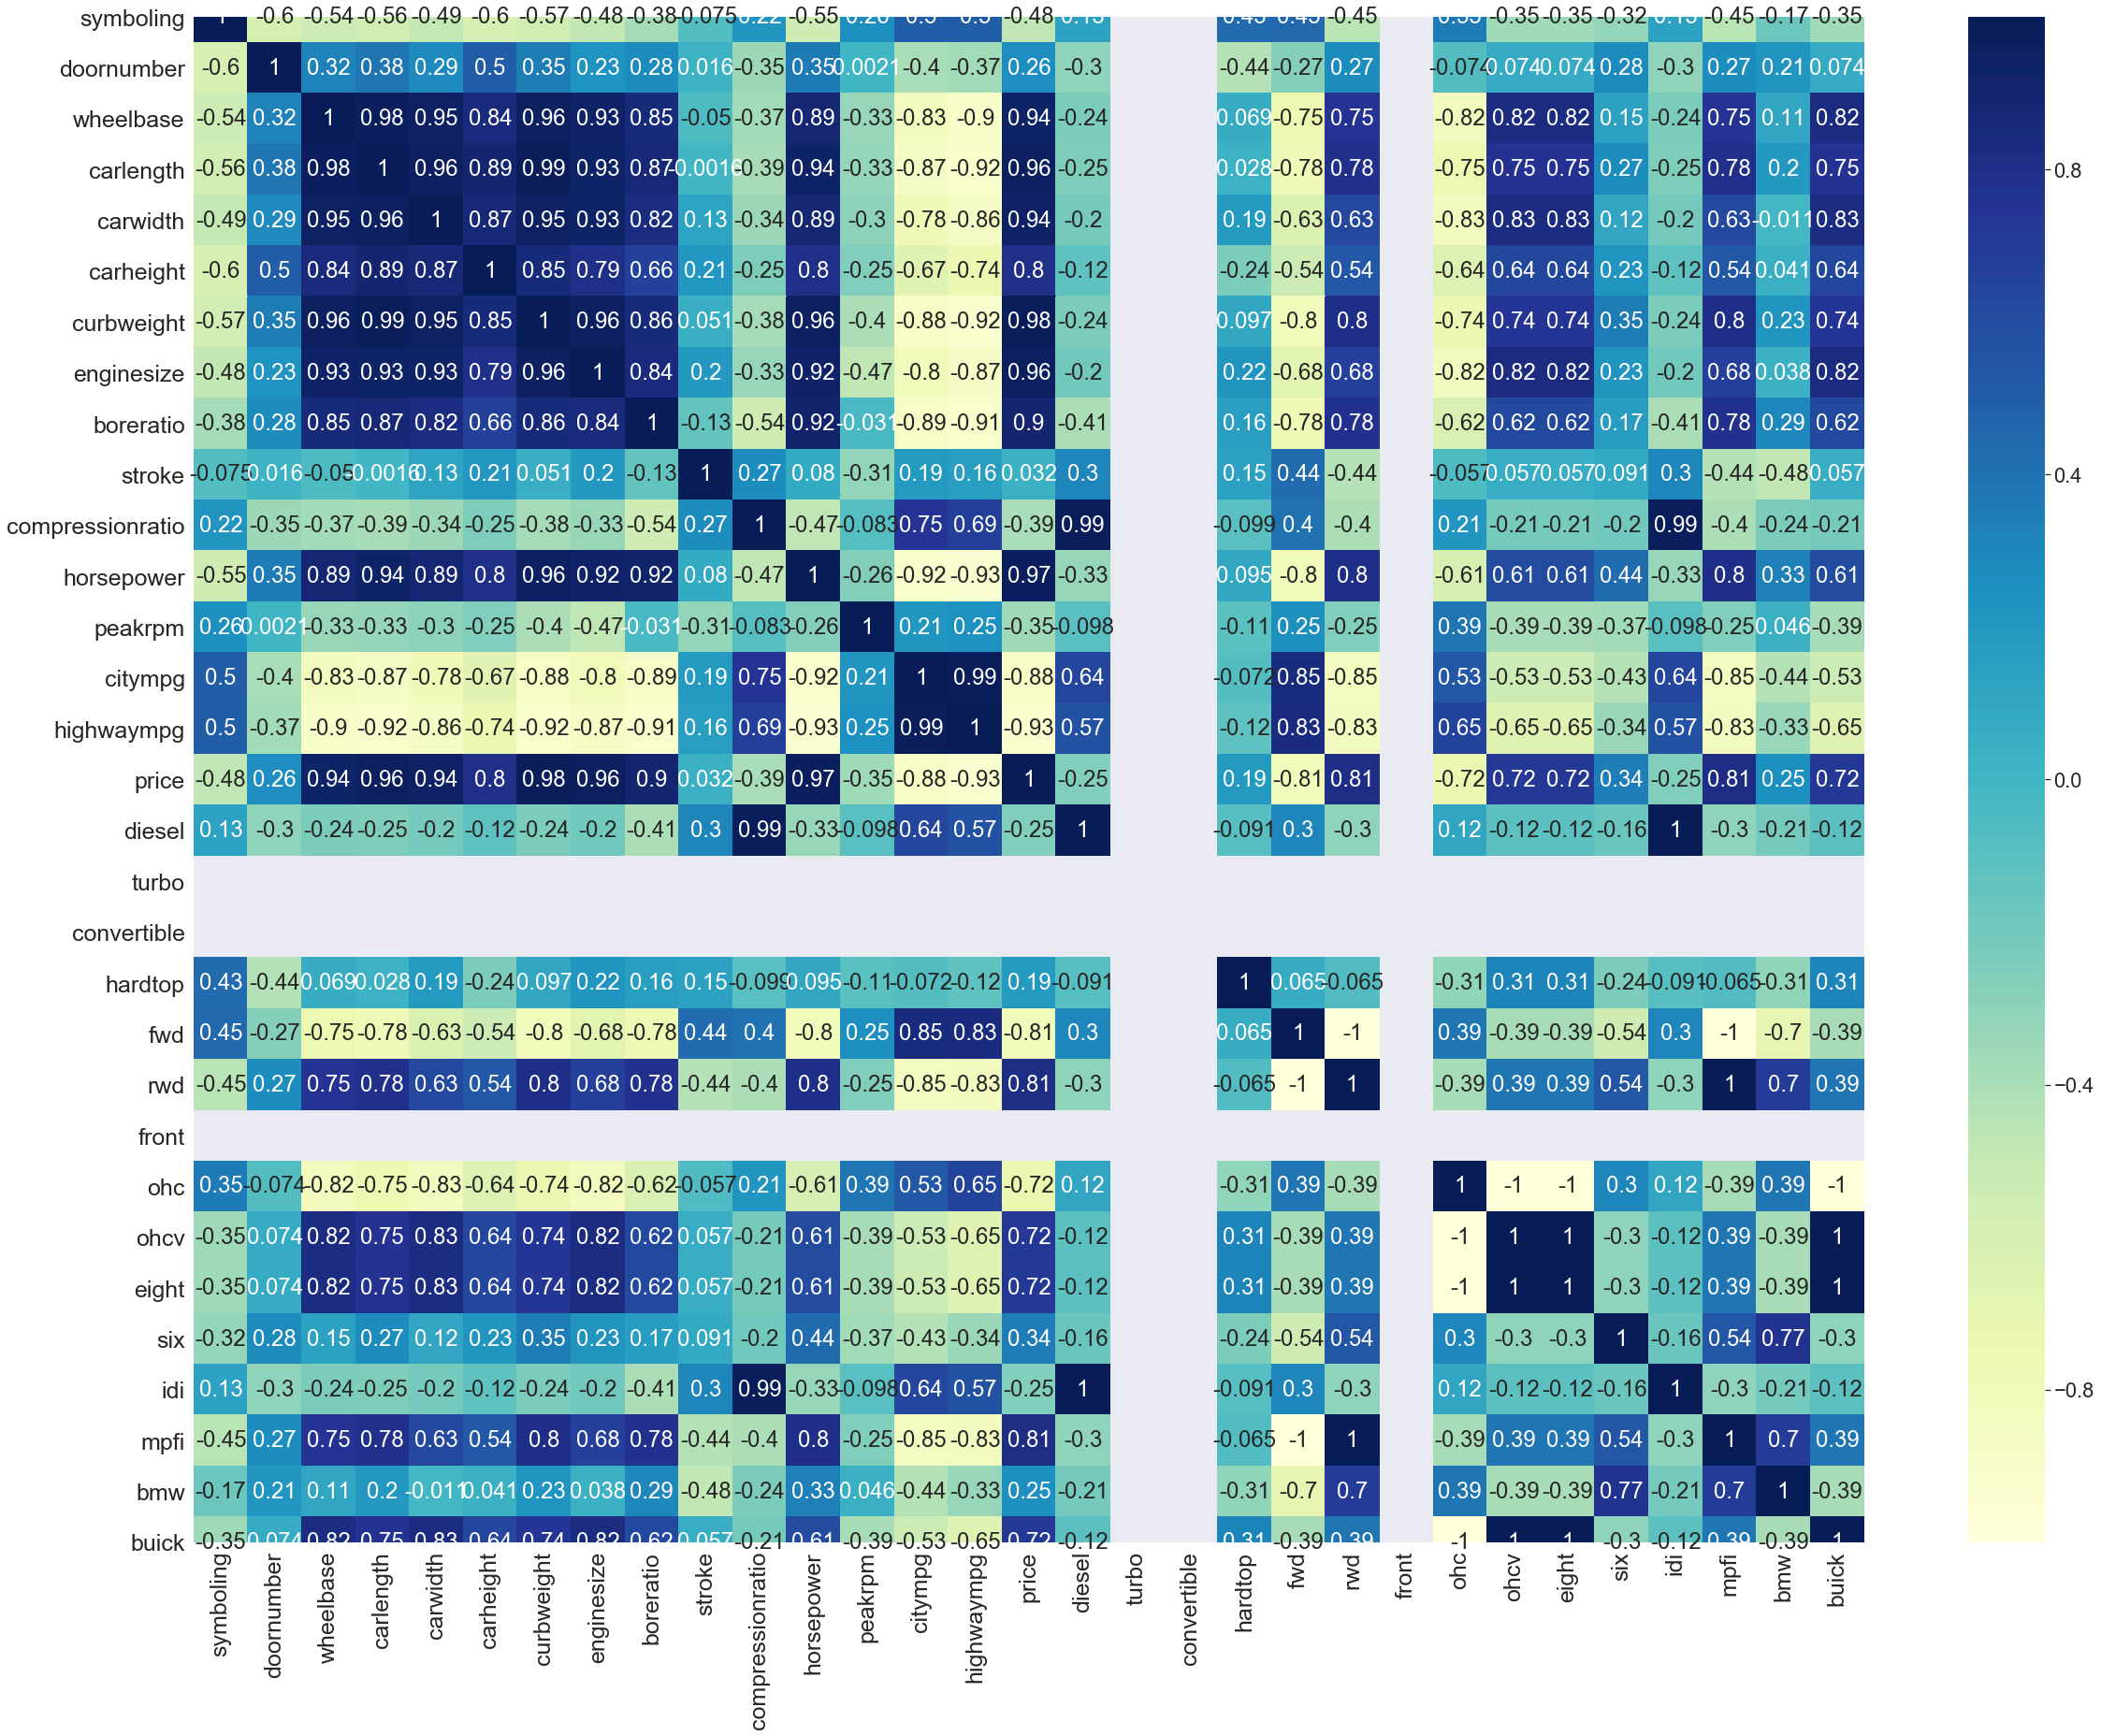

In [283]:
# Check of the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
plt.tick_params(labelsize=25)
sns.set(font_scale = 2)
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From this correlation matrix, it can be seen that price has very strong correlation with approx. 20 independent variables, considering significant correlation value > absolute of 0.3. Also, can be seen that strong multicollinearity is found between many independent variables.

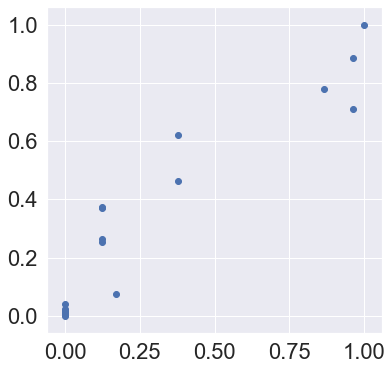

In [284]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.carwidth, df_train.price)
plt.show()

### Step5: Dividing into X and Y sets for the model building on train set of data and model building with RFE

In [285]:
y_train = df_train.pop('price')
X_train = df_train

In [286]:
X_train.shape

(17, 30)

### Model buliding with RFE
RFE model has been used as it is an automated model, which will help in initial screening of the undesired independent variables, this is required here as the number of independent variables are very high. 

In [287]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [288]:
# Running RFE with the output number of the variable equal to 17
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 17)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [289]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 7),
 ('doornumber', False, 11),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 3),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('diesel', True, 1),
 ('turbo', False, 12),
 ('convertible', False, 13),
 ('hardtop', True, 1),
 ('fwd', False, 4),
 ('rwd', False, 5),
 ('front', False, 14),
 ('ohc', False, 9),
 ('ohcv', False, 8),
 ('eight', False, 10),
 ('six', True, 1),
 ('idi', True, 1),
 ('mpfi', False, 2),
 ('bmw', True, 1),
 ('buick', False, 6)]

In [290]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'citympg', 'highwaympg', 'diesel', 'hardtop', 'six', 'idi', 'bmw'],
      dtype='object')

In [291]:
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'peakrpm', 'turbo', 'convertible', 'fwd',
       'rwd', 'front', 'ohc', 'ohcv', 'eight', 'mpfi', 'buick'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [292]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [293]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [294]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [295]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3018.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.56e-07
Time:                        16:03:25   Log-Likelihood:                 72.066
No. Observations:                  17   AIC:                            -118.1
Df Residuals:                       4   BIC:                            -107.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1499      0.090  

Adjusted R - squared as 1 shows its ideal required value, but same time p value should be less than 0.05 for a variable to be significant. Here for many variables this value is more than this threshold, so will drop such variables one by one from the current model. Among all 'highwaympg' has largest p value of 0.6, so will drop this 1st.

In [296]:
X_train_rfe.shape

(17, 18)

In [297]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
9,compressionratio,inf
1,wheelbase,inf
16,idi,inf
15,six,inf
14,hardtop,inf
13,diesel,inf
12,highwaympg,inf
11,citympg,inf
10,horsepower,inf
17,bmw,inf


Very high values of VIF for all except 'const' is indicating that there are very high multicollinearity among variables.

#### Dropping the variable 'highwaympg' and updating the model

In [298]:
X_train_new = X_train_rfe.drop(["highwaympg"], axis = 1)

In [299]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [300]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [301]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3018.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.56e-07
Time:                        16:03:52   Log-Likelihood:                 72.066
No. Observations:                  17   AIC:                            -118.1
Df Residuals:                       4   BIC:                            -107.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1422      0.076  

In [302]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
8,stroke,inf
9,compressionratio,inf
15,idi,inf
14,six,inf
13,hardtop,inf
12,diesel,inf
11,citympg,inf
10,horsepower,inf
16,bmw,inf
1,wheelbase,inf


#### Dropping the variable 'horsepower' (because of high p value) and updating the model

In [303]:
X_train_new = X_train_new.drop(["horsepower"], axis = 1)

In [304]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [305]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [306]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3018.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.56e-07
Time:                        16:04:12   Log-Likelihood:                 72.066
No. Observations:                  17   AIC:                            -118.1
Df Residuals:                       4   BIC:                            -107.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2045      0.159  

In [307]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
1,wheelbase,inf
2,carlength,inf
3,carwidth,inf
4,carheight,inf
6,enginesize,inf
7,boreratio,inf
8,stroke,inf
9,compressionratio,inf
10,citympg,inf
11,diesel,inf


#### Dropping the variable 'six' (because of high p value) and updating the model

In [308]:
X_train_new = X_train_new.drop(["six"], axis = 1)

In [309]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [310]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [311]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3018.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.56e-07
Time:                        16:04:31   Log-Likelihood:                 72.066
No. Observations:                  17   AIC:                            -118.1
Df Residuals:                       4   BIC:                            -107.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1868      0.177  

In [312]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
1,wheelbase,inf
2,carlength,inf
3,carwidth,inf
4,carheight,inf
6,enginesize,inf
7,boreratio,inf
8,stroke,inf
9,compressionratio,inf
10,citympg,inf
11,diesel,inf


#### Dropping the variable 'citympg' (because of high p value) and updating the model

In [313]:
X_train_new = X_train_new.drop(["citympg"], axis = 1)

In [314]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [315]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [316]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3018.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.56e-07
Time:                        16:04:50   Log-Likelihood:                 72.066
No. Observations:                  17   AIC:                            -118.1
Df Residuals:                       4   BIC:                            -107.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1135      0.109  

In [317]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
10,diesel,inf
12,idi,inf
9,compressionratio,9861.60
0,const,3915.49
5,curbweight,2724.24
6,enginesize,779.14
7,boreratio,541.99
2,carlength,461.89
1,wheelbase,158.16
4,carheight,106.49


#### Dropping the variable 'idi' (because of high p value) and updating the model

In [318]:
X_train_new = X_train_new.drop(["idi"], axis = 1)

In [319]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [320]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [321]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3018.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.56e-07
Time:                        16:05:07   Log-Likelihood:                 72.066
No. Observations:                  17   AIC:                            -118.1
Df Residuals:                       4   BIC:                            -107.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1135      0.109  

In [322]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
9,compressionratio,9861.60
10,diesel,8324.89
0,const,3915.49
5,curbweight,2724.24
6,enginesize,779.14
7,boreratio,541.99
2,carlength,461.89
1,wheelbase,158.16
4,carheight,106.49
12,bmw,83.53


#### Dropping the variable 'diesel' (because of high p value) and updating the model

In [323]:
X_train_new = X_train_new.drop(["diesel"], axis = 1)

In [324]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [325]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [326]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3078.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           7.67e-09
Time:                        16:05:24   Log-Likelihood:                 69.598
No. Observations:                  17   AIC:                            -115.2
Df Residuals:                       5   BIC:                            -105.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0122      0.014  

In [327]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
2,carlength,394.00
5,curbweight,310.60
0,const,63.16
6,enginesize,57.13
1,wheelbase,55.19
4,carheight,49.94
3,carwidth,49.13
7,boreratio,17.31
11,bmw,10.04
10,hardtop,6.54


#### Dropping the variable 'wheelbase' (because of high p value) and updating the model

In [328]:
X_train_new = X_train_new.drop(["wheelbase"], axis = 1)

In [329]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [330]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [331]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2350.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           5.81e-10
Time:                        16:05:40   Log-Likelihood:                 64.945
No. Observations:                  17   AIC:                            -107.9
Df Residuals:                       6   BIC:                            -98.73
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0026      0.014  

In [332]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
1,carlength,322.55
4,curbweight,310.45
5,enginesize,55.67
2,carwidth,46.63
0,const,44.78
3,carheight,40.16
6,boreratio,17.13
10,bmw,8.58
9,hardtop,5.08
7,stroke,5.00


#### Dropping the variable 'curbweight' (because of high p value) and updating the model

In [333]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [334]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [335]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [336]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1839.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           5.78e-11
Time:                        16:05:58   Log-Likelihood:                 60.655
No. Observations:                  17   AIC:                            -101.3
Df Residuals:                       7   BIC:                            -92.98
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0036      0.017  

In [337]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
1,carlength,120.33
0,const,42.69
2,carwidth,39.59
3,carheight,34.16
4,enginesize,27.87
5,boreratio,7.18
8,hardtop,5.07
6,stroke,4.26
9,bmw,3.30
7,compressionratio,1.58


#### Dropping the variable 'compressionratio' (because of high p value) and updating the model

In [338]:
X_train_new = X_train_new.drop(["compressionratio"], axis = 1)

In [339]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [340]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [341]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1638.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           4.84e-12
Time:                        16:06:19   Log-Likelihood:                 57.540
No. Observations:                  17   AIC:                            -97.08
Df Residuals:                       8   BIC:                            -89.58
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.018      0.691      0.5

#### Dropping the variable 'boreratio' (because of high p value) and updating the model

In [342]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

In [343]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [344]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [345]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1352.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           7.27e-13
Time:                        16:06:32   Log-Likelihood:                 53.772
No. Observations:                  17   AIC:                            -91.54
Df Residuals:                       9   BIC:                            -84.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.019      1.537      0.1

Here we can see that except for 'const', for all variables p values are < 0.05; so now I will deal on multicollinerity based on VIF.

In [346]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
1,carlength,118.19
2,carwidth,39.30
3,carheight,33.35
0,const,31.32
4,enginesize,26.87
6,hardtop,4.99
5,stroke,4.12
7,bmw,3.21


#### Dropping the variable 'carlength' (because of highest VIF) and updating the model

In [347]:
X_train_new = X_train_new.drop(["carlength"], axis = 1)

In [348]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [349]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [350]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     539.1
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           5.81e-12
Time:                        16:06:49   Log-Likelihood:                 43.771
No. Observations:                  17   AIC:                            -73.54
Df Residuals:                      10   BIC:                            -67.71
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0032      0.030     -0.106      0.9

In [351]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
1,carwidth,27.55
0,const,26.81
2,carheight,19.88
3,enginesize,8.94
5,hardtop,4.96
4,stroke,1.99
6,bmw,1.58


#### Dropping the variable 'carheight' (because of highest p value) and updating the model

In [352]:
X_train_new = X_train_new.drop(["carheight"], axis = 1)

In [353]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [354]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [355]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     665.8
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.92e-13
Time:                        16:07:07   Log-Likelihood:                 43.206
No. Observations:                  17   AIC:                            -74.41
Df Residuals:                      11   BIC:                            -69.41
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.021      0.709      0.4

In [356]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
0,const,13.07
2,enginesize,8.88
1,carwidth,8.26
5,bmw,1.58
3,stroke,1.49
4,hardtop,1.20


#### Dropping the variable 'stroke' (because of highest p value) and updating the model

In [357]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)

In [358]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [359]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [360]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     829.8
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           1.53e-14
Time:                        16:07:24   Log-Likelihood:                 42.444
No. Observations:                  17   AIC:                            -74.89
Df Residuals:                      12   BIC:                            -70.72
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.009     -0.441      0.6

In [361]:
X_train_new.columns

Index(['const', 'carwidth', 'enginesize', 'hardtop', 'bmw'], dtype='object')

#### Dropping the variable 'const' (because of high p value) and checking the model for VIF

In [362]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [363]:
X_train_new.columns

Index(['carwidth', 'enginesize', 'hardtop', 'bmw'], dtype='object')

In [364]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
1,enginesize,13.78
0,carwidth,12.66
3,bmw,1.32
2,hardtop,1.23


#### Dropping the variable 'enginesize' (because of highest VIF value > 10) and updating the model

In [365]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)

In [366]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [367]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [368]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.58e-09
Time:                        16:11:57   Log-Likelihood:                 21.915
No. Observations:                  17   AIC:                            -35.83
Df Residuals:                      13   BIC:                            -32.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.030      0.054      0.9

In [369]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
0,carwidth,1.40
2,bmw,1.22
1,hardtop,1.18


#### Dropping the variable 'hardtop' (because of high p value > 0.05) and updating the model

In [370]:
X_train_new = X_train_new.drop(["hardtop"], axis = 1)

In [371]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [372]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [373]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           8.22e-10
Time:                        16:13:01   Log-Likelihood:                 20.024
No. Observations:                  17   AIC:                            -34.05
Df Residuals:                      14   BIC:                            -31.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0183      0.031      0.594      0.5

In [374]:
# Create a dataframe that will contain the names of all the independent variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Ind_variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Ind_variables,VIF
0,carwidth,1.19
1,bmw,1.19


#### The 'const' term (because of high p value > 0.05) is insignificant and will not be used while predicting the price of a car. With other two variables, p values are < 0.05 and VIF is also < 5, so the final equation for the price will have only two independent variables 'carwidth' and 'bmw' as a carcompany.

### Step6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is, one of the major assumptions of linear regression), plotting the histogram of the error terms and checking how does it looks like.

In [376]:
y_train_price = lm.predict(X_train_lm)

In [377]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

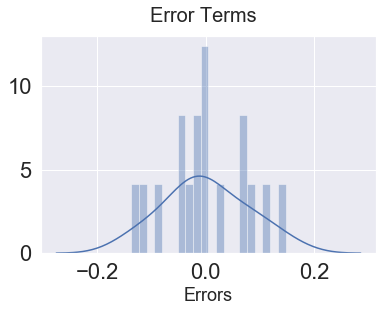

In [378]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

So errors are normally distributed around mean as 0, so train model completely meeting the major assumptions of linear regression.

### Step7: Making Predictions


#### Applying the scaling on the test sets

In [379]:
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [380]:
y_test = df_test.pop('price')
X_test = df_test

In [381]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [382]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Step8: Model Evaluation


Text(0, 0.5, 'y_pred')

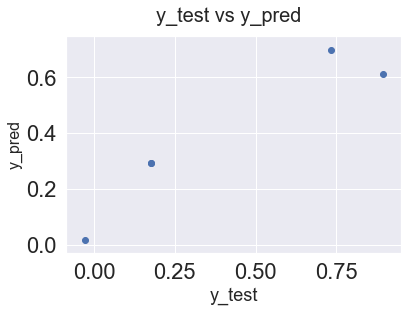

In [383]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [384]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.827654734172387

R sqaure value 0.83 shows a good fit between y_test and y_pred.

## The equation of the best fitted line is:

$ price = 0.8345  \times  carwidth + 0.1766  \times  bmw $

This equation gives message to the management of the company Gelle Auto, that price of the car in US market is significantly dependent on carwidth and the brand name as 'bmw'. Since coefficeint of carwidth is much higher than the same of bmw, meaning that among these two variables, carwidth will play a major role in deciding the price dynamics in the market. Finally, using these two significant independent variables management can decide their business strategy.